In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 8)

df = pd.read_csv('UCI_Credit_Card.csv')
df.loc[:,'label'] = df.loc[:,'default.payment.next.month']
df = df.drop('default.payment.next.month', axis=1)
df = df.iloc[:,1:]
df = df.sample(1000)

# Credit card fraud detection

### Data considered

https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

### Dataset Information

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Variables
There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- label: Default payment (1=yes, 0=no)

In [6]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,label
9399,100000.0,2,3,2,66,0,0,0,0,0,...,86802.0,88912.0,90400.0,3035.0,3100.0,3100.0,3500.0,3500.0,7100.0,1
2558,50000.0,1,2,2,39,0,0,0,0,0,...,10588.0,8368.0,940.0,1708.0,1454.0,289.0,1508.0,1042.0,0.0,0
3406,170000.0,2,1,2,26,0,0,0,0,0,...,33153.0,24969.0,22893.0,4000.0,2006.0,1000.0,1000.0,1000.0,1000.0,0
3046,330000.0,2,2,1,41,1,2,2,2,2,...,306752.0,313710.0,309446.0,0.0,22200.0,12000.0,12000.0,978.0,23500.0,0
22272,180000.0,2,2,1,28,0,0,0,0,0,...,39649.0,39221.0,40731.0,2000.0,2002.0,2000.0,2000.0,2000.0,2000.0,0


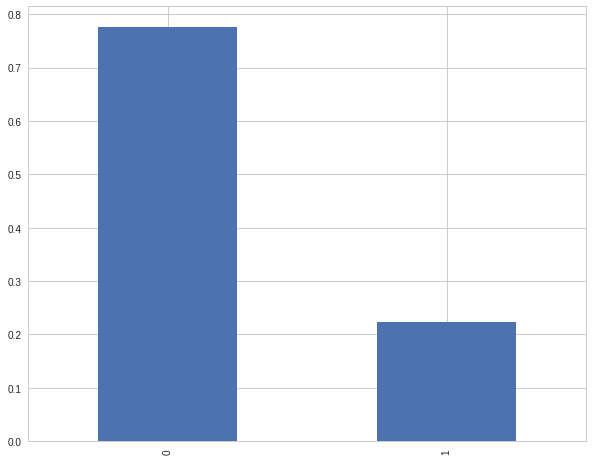

In [44]:
ax = df.loc[:,'label'].value_counts(normalize=True).plot.bar()

## Simple model

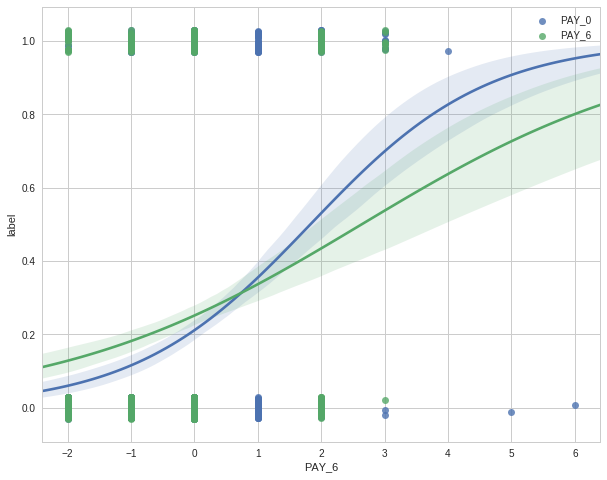

In [15]:
ax = sns.regplot(x="PAY_0", y="label", data=df, label='PAY_0',
                 logistic=True, n_boot=500, y_jitter=.03)
sns.regplot(x="PAY_6", y="label", data=df, label='PAY_6',
            logistic=True, n_boot=500, y_jitter=.03, ax=ax)
ax.legend()

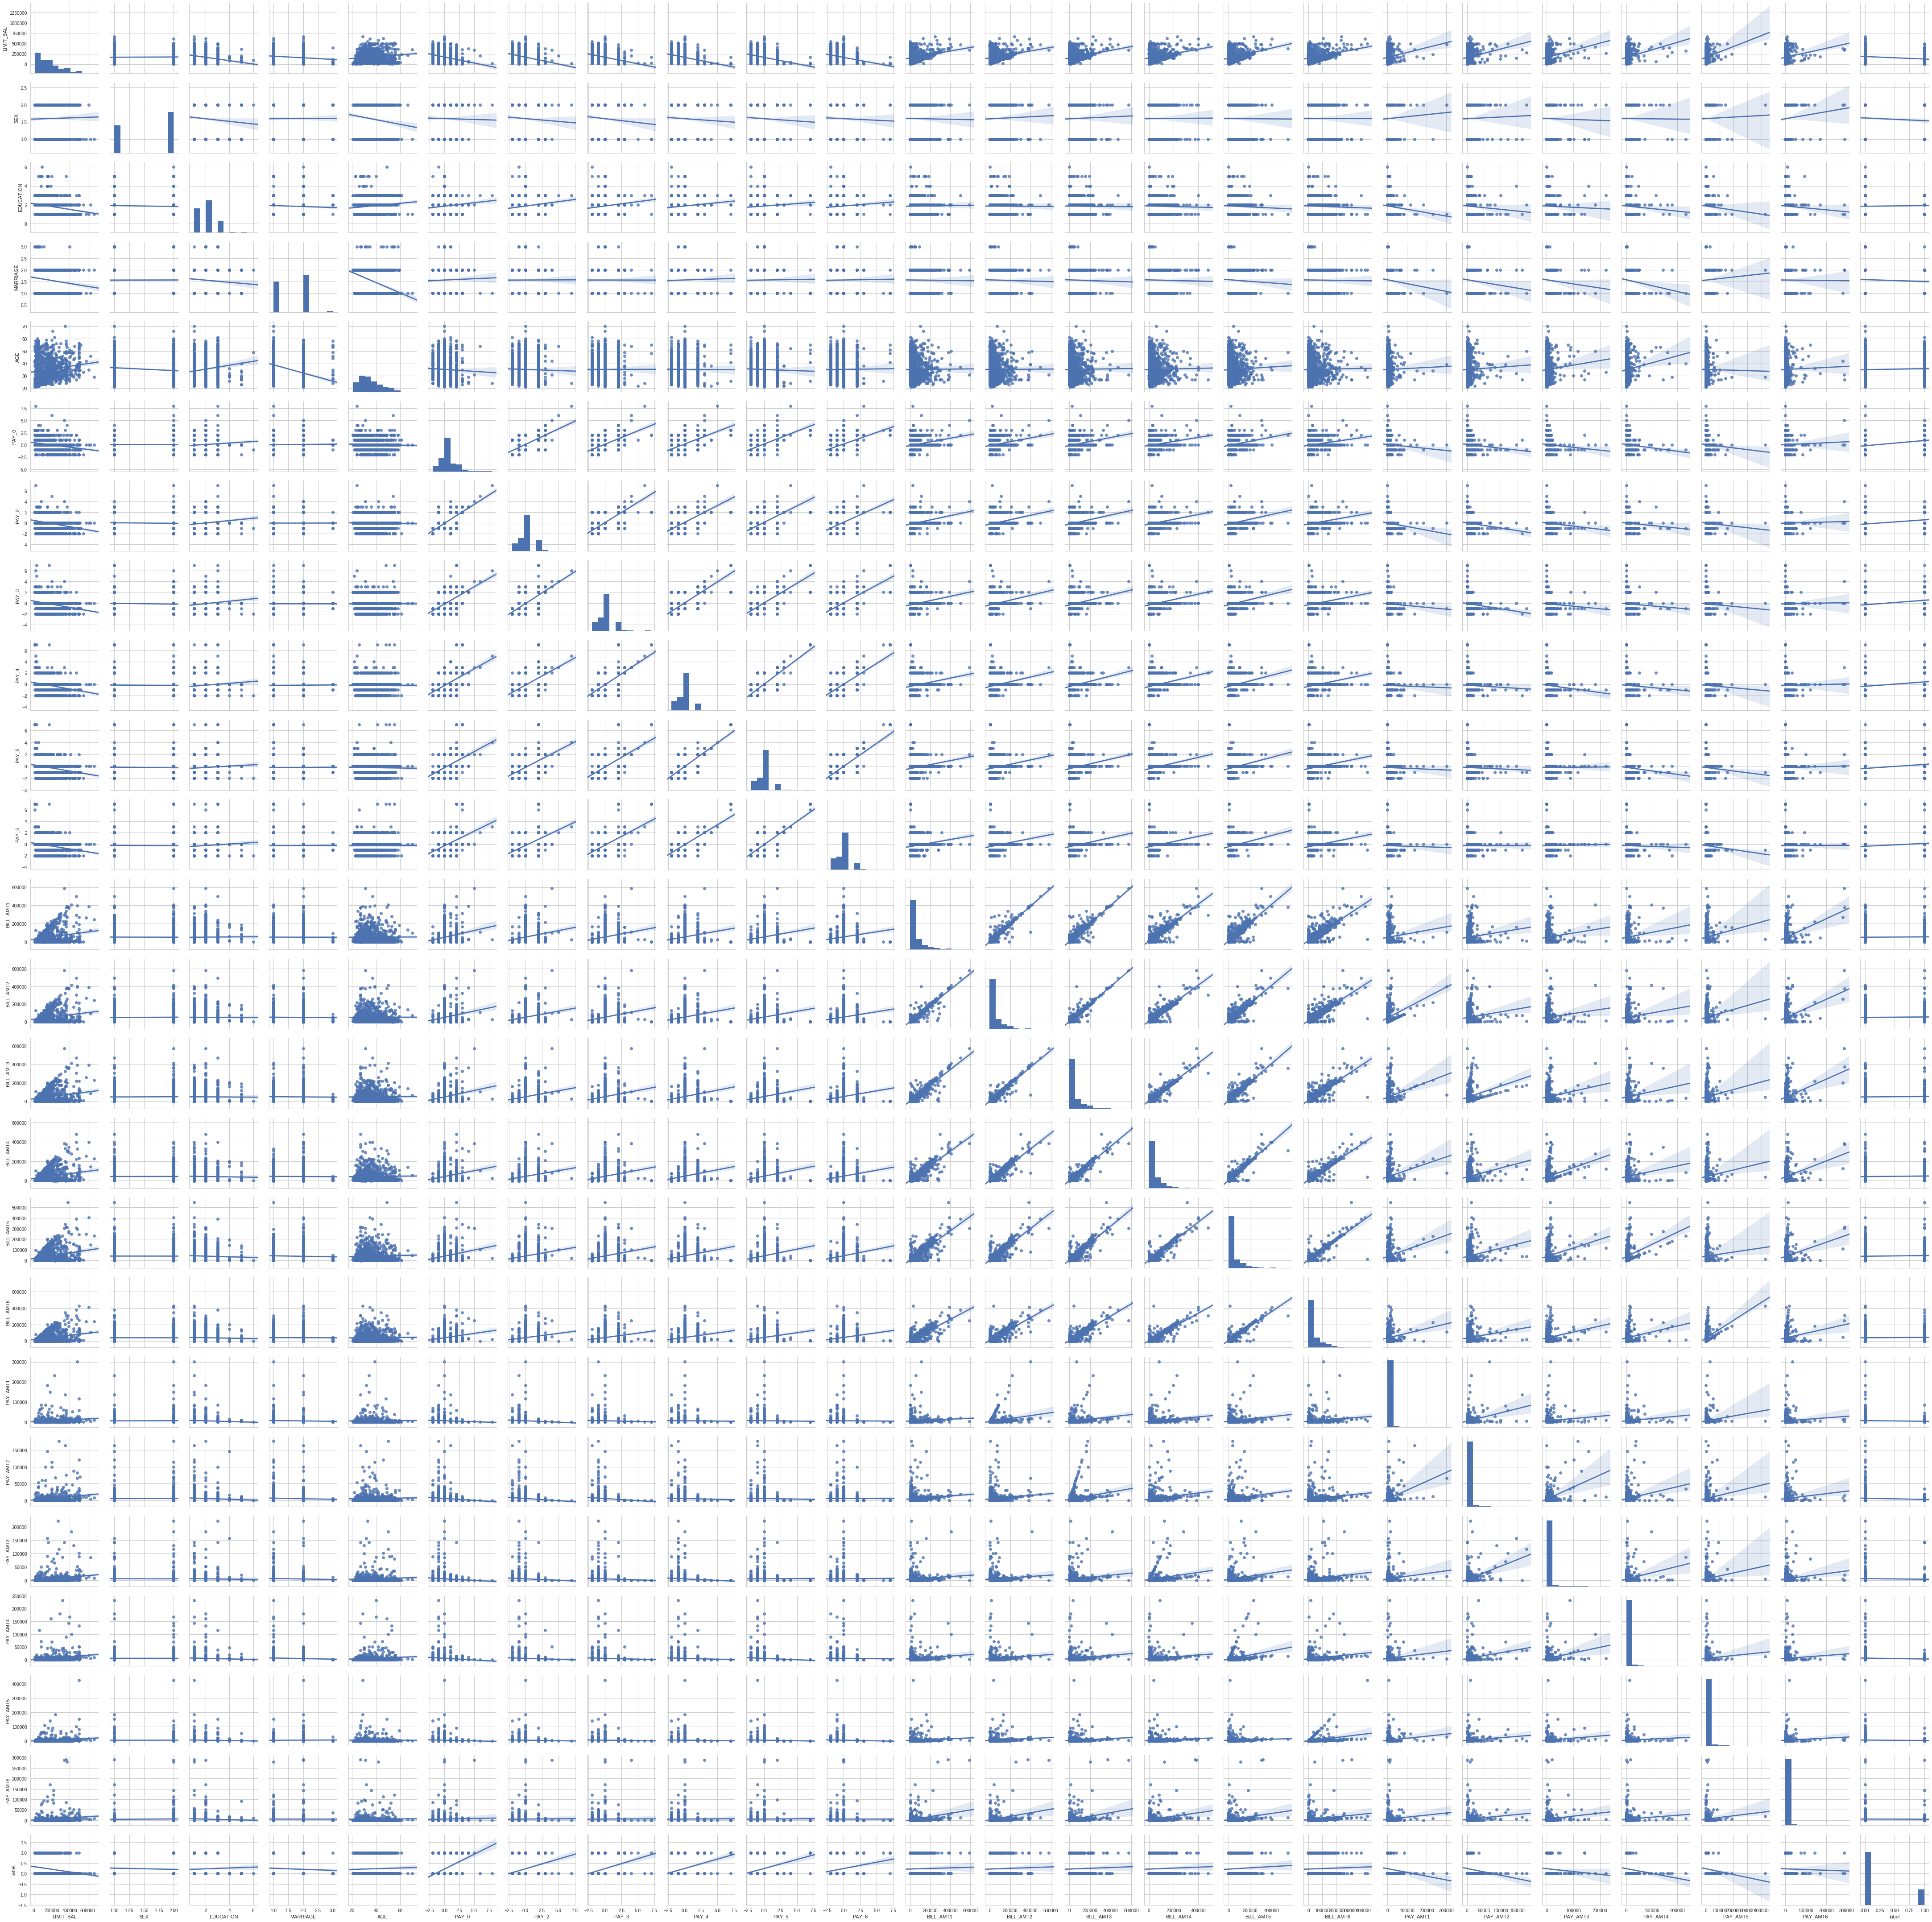

In [50]:
sns.pairplot(df, kind="reg")

# Random Forest Classifier

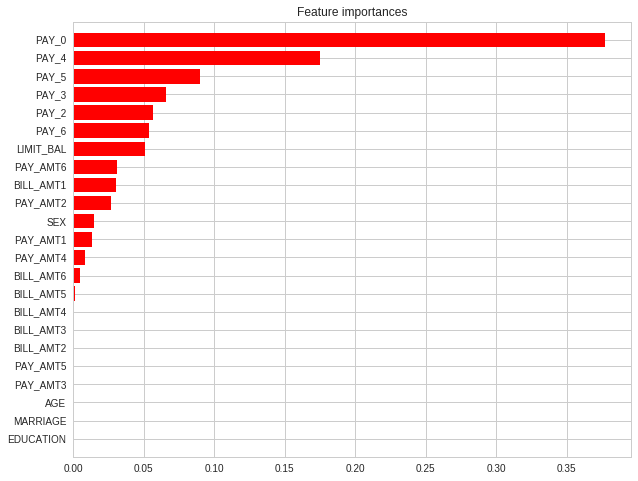

In [29]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('label', axis=1)
Y = df.label

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X,Y)

importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the random forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
         color="r", xerr=std[indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.ylim([-1, X.shape[1]])
plt.show()

In [49]:
print("Accuracy: " + str(sum(clf.predict(X) == Y) / len(Y)))

Accuracy: 0.82
